# Hypothesis testing problems

In [85]:
# import the packages
import numpy as np
import numpy.typing as npt
import scipy.stats as stats # type: ignore
import matplotlib.pyplot as plt

from scipy.stats._stats_py import TtestResult, ConfidenceInterval, F_onewayResult # type: ignore

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

### Solution

**Null Hypothesis H0**: There is no difference (mean 1 = mean 2)

**Alternative Hypothesis H1**: There is difference (mean 1 != mean 2)

This is a bilateral test and we are going to work with significance of 0.05

In [86]:
# define the diets
diet_1: npt.NDArray[np.float64] = np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
diet_2: npt.NDArray[np.float64] = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])

In [87]:
# calculate the t statistics and the value of p
t_student_result: TtestResult = stats.ttest_ind(a=diet_1, b=diet_2) # type: ignore

# get the values
t_statistic: float = t_student_result.statistic # type: ignore
p_value: float = t_student_result.pvalue  # type: ignore
degrees_freedom: float = t_student_result.df # type: ignore
confidence_interval: ConfidenceInterval = t_student_result.confidence_interval() # type: ignore

# print the values
print(f'Value of the t-statistic.: {t_statistic}')
print(f'Value of p: {p_value}')
print(f'Number of degrees of freedom used in the calculation:  {degrees_freedom}')
print(f'Confidence interval: ({confidence_interval.low + 1}, {confidence_interval.high + 1})') # type: ignore

Value of the t-statistic.: -3.5383407969933938
Value of p: 0.004083270191713912
Number of degrees of freedom used in the calculation:  12.0
Confidence interval: (0.21519623195989346, 0.8133751966115359)


#### Conclusion:

Because the value of p is smaller than 0.05 (the value of significance selected) we have to reject the null Hypothesis. 

Therefore it seems that there is a difference between the average of one group and the other, that is, the average weight loss between the two groups is different.

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

### Solution

**Null Hypothesis H0**: There is no difference in the amount (Kg) of corn produced (mean 1 = mean 2 = mean 3)

**Alternative Hypothesis H1**: There is difference in the amount (Kg) of corn produced (at least one of the means is different)

In [88]:
# define the fertilizers
fertilizer_1: npt.NDArray[np.int64] = np.array([20, 21, 20, 19, 20])
fertilizer_2: npt.NDArray[np.int64] = np.array([22, 21, 23, 22, 21])
fertilizer_3: npt.NDArray[np.int64] = np.array([24, 23, 22, 23, 24])

In [89]:
# calculate the t statistics and the value of p
anova_result: F_onewayResult = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3) # type: ignore
print(anova_result)

# get the values
t_statistic: float = anova_result.statistic # type: ignore
p_value: float = anova_result.pvalue  # type: ignore

# print the values
print(f'Value of the t-statistic.: {t_statistic}')
print(f'Value of p: {p_value}')

F_onewayResult(statistic=np.float64(20.315789473684188), pvalue=np.float64(0.00014047824793190472))
Value of the t-statistic.: 20.315789473684188
Value of p: 0.00014047824793190472


#### Conclusion:

Because the value of p is smaller than 0.05 (the value of significance selected) we have to reject the null Hypothesis. 

So it seems that there is one average that is at least different from the others.

#### Selecting the best

To select the best option of fertilizers we need to use a Post Hoc test. Some of this tests are:

- **Tukey HSD (Honest Significant Difference) test**: This is one of the most commonly used post hoc tests and is suitable when sample sizes are equal.
- **Bonferroni test**: This is a conservative test that controls for type I error.
- **Scheffé test**: This is a very conservative test and is suitable when many comparisons are made.
- **Duncan test**: This is a more liberal test than the Tukey test and may be more prone to type I errors.

We are going to use the Tukey HSD test.

In [90]:
# doing the Tukey HSD test
res = stats.tukey_hsd(fertilizer_1, fertilizer_2, fertilizer_3) # type: ignore
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.800     0.010    -3.143    -0.457
 (0 - 2)     -3.200     0.000    -4.543    -1.857
 (1 - 0)      1.800     0.010     0.457     3.143
 (1 - 2)     -1.400     0.041    -2.743    -0.057
 (2 - 0)      3.200     0.000     1.857     4.543
 (2 - 1)      1.400     0.041     0.057     2.743



No p-value is greater than 0.05, that means that no statistically significant differences were found between the means of the groups compared. So we cannot get a conclusion with the test.

To select a Fertilizer we are going to graph the means and select the greater one.

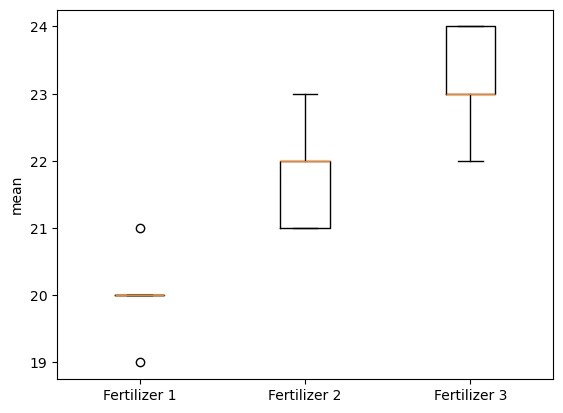

In [91]:
# plot the means
fig, ax = plt.subplots(1, 1) # type: ignore

ax.boxplot([fertilizer_1, fertilizer_2, fertilizer_3])
ax.set_xticklabels(["Fertilizer 1", "Fertilizer 2", "Fertilizer 3"]) # type: ignore
ax.set_ylabel("mean") # type: ignore
plt.show() # type: ignore

With the graph we can get to the conclusion that the **third fertilizer** is the best, and it is the best option to get the most amount of Kgs of corn.